<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



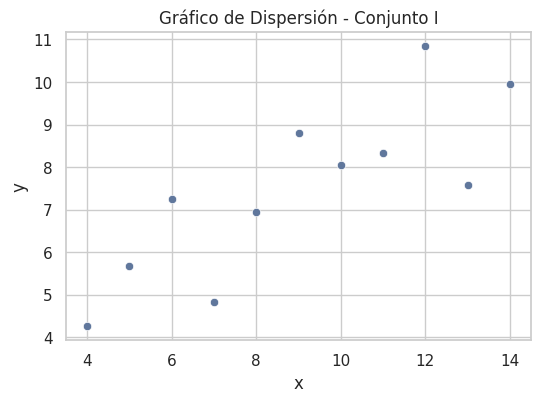

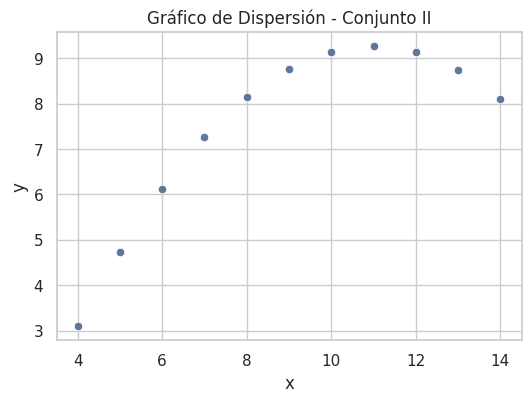

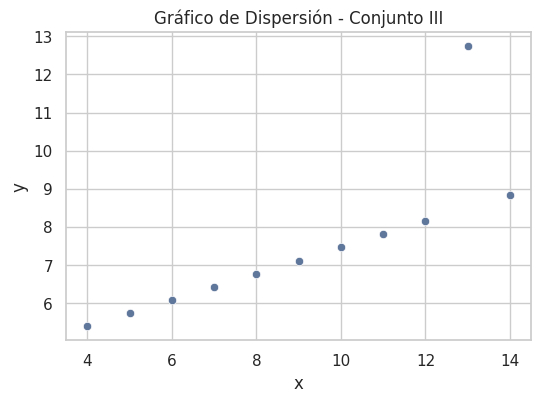

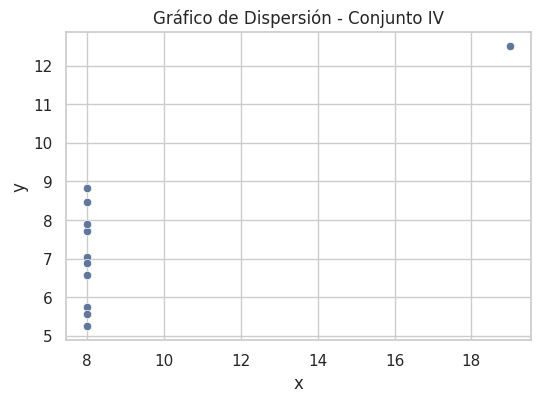

In [2]:
for dataset_name in data['dataset'].unique():
    dataset = data[data['dataset'] == dataset_name]
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x='x', y='y', data=dataset)
    plt.title(f'Gráfico de Dispersión - Conjunto {dataset_name}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

Después de ver los gráficos de dispersión, es impresionante cómo conjuntos de datos con estadísticas descriptivas casi idénticas pueden verse tan diferentes. El Conjunto I es el más "normal" de todos, con puntos que se alinean bastante bien a lo largo de una línea recta, sugiriendo una relación lineal clara. En contraste, el Conjunto II muestra una relación no lineal, con una curva clara, lo que indica que un modelo lineal no sería adecuado. El Conjunto III parece tener una relación lineal, similar al Conjunto I, pero con un punto atípico que influye significativamente en las estadísticas. Finalmente, el Conjunto IV es el más peculiar, con la mayoría de los puntos alineados verticalmente y un solo punto atípico que crea la apariencia de una correlación lineal en las estadísticas, a pesar de que la mayoría de los datos no muestran esta relación. Esto subraya que confiar solo en números puede ser engañoso y que la visualización es crucial para entender la verdadera estructura de los datos.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [3]:
descriptive_stats = data.groupby('dataset').describe()
print(descriptive_stats)

            x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50  


A pesar de las claras diferencias visuales que vimos en los gráficos de dispersión, las estadísticas descriptivas para los cuatro conjuntos son casi idénticas.

Media y desviación estándar: La media y la desviación estándar para las variables 'x' e 'y' son prácticamente las mismas en los cuatro grupos. Esto significa que, en promedio, los valores y su dispersión son muy similares numéricamente.
Mínimo, 25%, 50% (mediana), 75% y máximo: Estas estadísticas, que nos dan una idea de la distribución de los datos (cuartiles y rango), también son muy parecidas entre los grupos.
Esta similitud en las estadísticas es precisamente el punto central del cuarteto de Anscombe. Demuestra que las medidas de resumen numérico, por sí solas, pueden ser engañosas y no revelan la verdadera estructura de los datos. Aunque los números sugieren que los conjuntos son similares, los gráficos nos mostraron que tienen comportamientos muy distintos: uno lineal, otro curvo, uno con un outlier influyente y otro con la mayoría de los puntos concentrados.

En resumen, las estadísticas descriptivas son útiles, pero deben complementarse siempre con visualizaciones para obtener una comprensión completa y precisa de los datos.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



Conjunto I:
  Error Cuadrático Medio (MSE): 1.25
  Coeficiente de Determinación (R²): 0.67
------------------------------


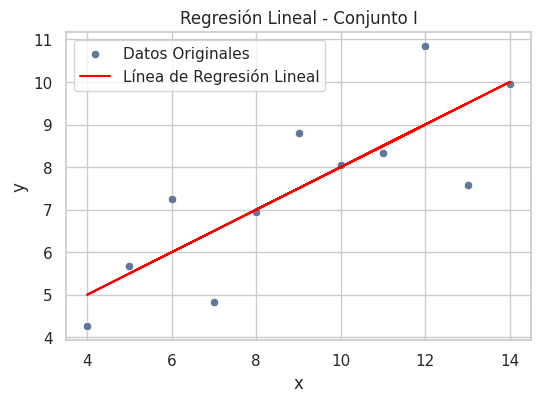

Conjunto II:
  Error Cuadrático Medio (MSE): 1.25
  Coeficiente de Determinación (R²): 0.67
------------------------------


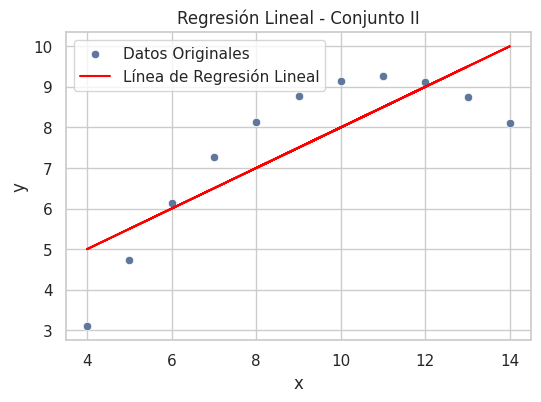

Conjunto III:
  Error Cuadrático Medio (MSE): 1.25
  Coeficiente de Determinación (R²): 0.67
------------------------------


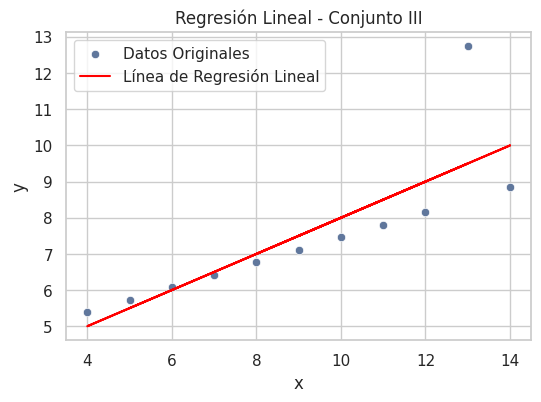

Conjunto IV:
  Error Cuadrático Medio (MSE): 1.25
  Coeficiente de Determinación (R²): 0.67
------------------------------


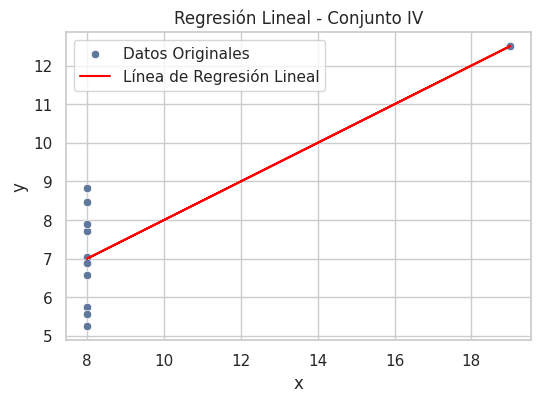

In [4]:
for dataset_name in data['dataset'].unique():
    dataset = data[data['dataset'] == dataset_name]
    X = dataset[['x']]
    y = dataset['y']

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"Conjunto {dataset_name}:")
    print(f"  Error Cuadrático Medio (MSE): {mse:.2f}")
    print(f"  Coeficiente de Determinación (R²): {r2:.2f}")
    print("-" * 30)

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x='x', y='y', data=dataset, label='Datos Originales')
    plt.plot(X, y_pred, color='red', label='Línea de Regresión Lineal')
    plt.title(f'Regresión Lineal - Conjunto {dataset_name}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

Es interesante ver que, a pesar de que los cuatro conjuntos de datos tienen métricas (MSE y R²) casi idénticas para la regresión lineal, la calidad del ajuste visual varía enormemente.

Para el Conjunto I, el ajuste lineal se ve bastante bien; los puntos siguen la línea de regresión.
Para el Conjunto II, la línea recta claramente no captura la curva de los datos, a pesar de que las métricas numéricas son las mismas que para el Conjunto I.
En el Conjunto III, la línea de regresión se ve influenciada por el punto atípico, distorsionando el ajuste para la mayoría de los puntos.
Finalmente, en el Conjunto IV, la línea de regresión es casi vertical debido al punto atípico, y no representa para nada la agrupación principal de los datos.
En resumen, aunque las métricas numéricas sugieran un ajuste similar, las visualizaciones son esenciales para confirmar si el modelo lineal es realmente apropiado para los datos. Las métricas solas pueden ser engañosas, especialmente en presencia de patrones no lineales o valores atípicos.

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

Para abordar los casos donde la regresión lineal simple no es adecuada, como en los conjuntos II, III y IV, se pueden aplicar diferentes estrategias:

*   Conjunto II (Relación no lineal): Se podría utilizar un modelo de regresión no lineal, como una regresión polinomial, que se ajustaría mejor a la curva observada en los datos.
*   Conjunto III (Outlier influyente): Una estrategia sería identificar y eliminar el punto atípico. Luego, se podría ajustar un modelo de regresión lineal a los datos restantes, lo que resultaría en un ajuste más representativo para la mayoría de los puntos.
*  Conjunto IV (Outlier y datos concentrados): Similar al Conjunto III, se podría eliminar el punto atípico. Tras la eliminación, se observaría que los puntos restantes no tienen una relación lineal clara, lo que indica que la regresión lineal no es el modelo apropiado para este conjunto, incluso sin el outlier.

Estas estrategias demuestran la importancia de visualizar los datos y seleccionar un modelo de regresión o una técnica de preprocesamiento que se adapte a la estructura subyacente de los datos, en lugar de confiar únicamente en las métricas de evaluación de un solo tipo de modelo.